# Introduction to Keras

Thomas Boquet: [@tboquet](https://github.com/tboquet) on github

# Objectives

- quick overview of a neural network library
- building models with **multiple levels of abstraction**
- reusing parts of models
- fine tuning parts of models

##### 1. How to choose a deep learning library?
##### 2. Libraries landscape
##### 3. What is Keras?
##### 4. Why Keras?
##### 5. Sequential API
##### 6. Functionnal API
##### 7. Conclusion
##### 8. Other ressources

# How to choose a deep learning library?

Before:

- be familiar with the underlying concepts covered by the tool
- think about your goals (research, production, learning) 

Main concerns:

- supported and used by a lot of people
- already in production in some companies
- will be alive for several years
- active contributors


# Libraries landscape

- [Lasagne](https://github.com/Lasagne/Lasagne) ([Theano](https://github.com/Theano/Theano))
- [Blocks](https://github.com/mila-udem/blocks) ([Theano](https://github.com/Theano/Theano))
- [Pretty tensor](https://github.com/google/prettytensor) ([TensorFlow](https://github.com/tensorflow/tensorflow))
- [Skflow](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/learn/python/learn) ([TensorFlow](https://github.com/tensorflow/tensorflow))
- [MxNet](https://github.com/dmlc/mxnet) (MxNet backend)
- [Cunn](https://github.com/torch/cunn), [nn](https://github.com/torch/nn), [autograd](https://github.com/twitter/torch-autograd), [optim]() ([Torch](https://github.com/torch), [CuTorch](https://github.com/torch))
- etc.

# What is Keras? 

- "Keras is a high-level neural networks library, written in Python and capable of running on top of either TensorFlow or Theano"
- different from Theano, Tensorflow, Neon
- Keras has its own backend wrapping these 2 libraries
- shorten length between ideas and results, implementation and production

# Tensorflow Backend

In [1]:
def dot(x, y):
    '''Multiplies 2 tensors.
    When attempting to multiply a ND tensor
    with a ND tensor, reproduces the Theano behavior
    (e.g. (2, 3).(4, 3, 5) = (2, 4, 5))
    '''
    if ndim(x) is not None and (ndim(x) > 2 or ndim(y) > 2):
        x_shape = (-1,) + int_shape(x)[1:]
        y_shape = int_shape(y)
        y_permute_dim = list(range(ndim(y)))
        y_permute_dim = [y_permute_dim.pop(-2)] + y_permute_dim
        xt = tf.reshape(x, [-1, x_shape[-1]])
        yt = tf.reshape(tf.transpose(y, perm=y_permute_dim), [y_shape[-2], -1])
        return tf.reshape(tf.matmul(xt, yt), x_shape[:-1] + y_shape[:-2] + y_shape[-1:])
    if is_sparse(x):
        out = tf.sparse_tensor_dense_matmul(x, y)
    else:
        out = tf.matmul(x, y)
    return out

# Theano Backend 

In [ ]:
def dot(x, y):
    if is_sparse(x):
        return th_sparse_module.basic.structured_dot(x, y)
    else:
        return T.dot(x, y)

# Why Keras?

- simple torch like syntax
- functionnal api (flexible)
- lots of examples and projects built with Keras
- research and production ready
- built-in tools (model and parameters serialization, callbacks, etc.)
- easily abstract ideas

### Prelude

It's better to configure our tensorflow session first

In [ ]:
from keras import backend as K
import tensorflow as tf
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
K.set_session(session)

Using TensorFlow backend.


# Sequential API

In [ ]:
from keras.models import Sequential

In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 128
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

input_shape = (img_rows, img_cols, 1)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)



X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## Dataset: mnist

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


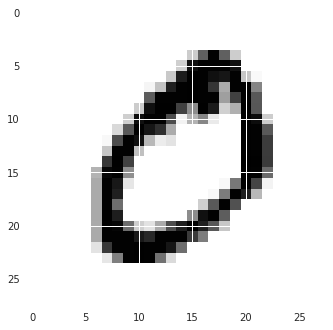

In [ ]:
plt.imshow(X_train[1], interpolation='nearest', cmap=cm.binary)
plt.show()

## MLP 

In [ ]:
X_train_f = X_train.reshape(-1, 28 * 28)
X_test_f = X_test.reshape(-1, 28 * 28)

mlp = Sequential()
mlp.add(Dense(512, input_shape=(28 * 28,), 
              name="hidden_layer_1"))        # First hidden layer with an input_shape
mlp.add(Dense(256, name="hidden_layer_2"))
mlp.add(Dense(10, name="output_layer"))
mlp.add(Activation('softmax'))               # Squash to 0-1 and normalize

### We "compile" the model

In fact it creates the `train` functions using the loss function and the trainable parameters

In [ ]:
mlp.compile(loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy'])

In [ ]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

def visu_model(model, width=None, height=None):
    return Image(model_to_dot(model, 
                              show_layer_names=True, 
                              show_shapes=True).create(prog='dot', format='png'),
                width=width, height=height)

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



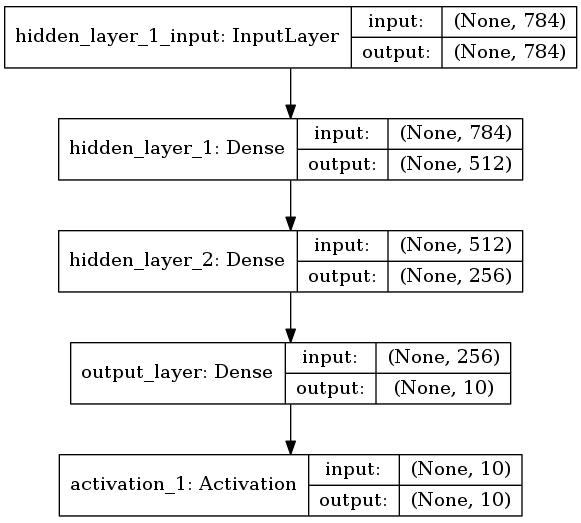

In [ ]:
visu_model(mlp)

In [ ]:
hist_mlp = mlp.fit(X_train_f,                          # Features
                   Y_train,                            # Target
                   batch_size=64,                      # nb samples in the mini batch
                   epochs=10,                          # nb of iteration
                   verbose=1,                          #
                   validation_data=(X_test_f, Y_test)) #

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.5614 - acc: 0.8518 - val_loss: 0.3502 - val_acc: 0.9027

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


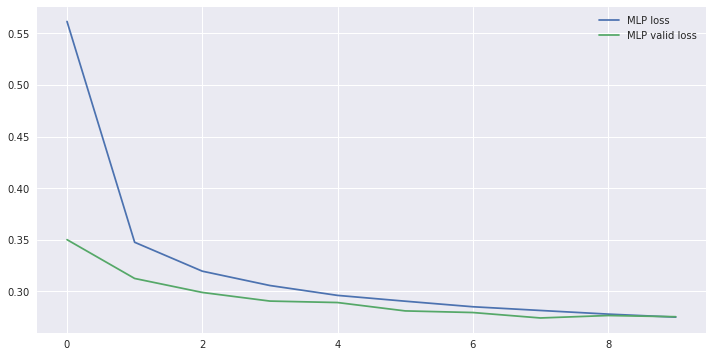

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(hist_mlp.history['loss'], label='MLP loss')
plt.plot(hist_mlp.history['val_loss'], label='MLP valid loss')
plt.legend()
plt.show()

# Convnet 

In [ ]:
convnet = Sequential()

convnet.add(Convolution2D(nb_filters,               # Nb of filters / kernels
                          (kernel_size[0],           # width of the filter
                          kernel_size[1]),           # height of the filter
                          padding='valid',          # padding
                          input_shape=input_shape)) # first layer so we need this
convnet.add(Activation('relu'))                     # Non linearity
convnet.add(MaxPooling2D(pool_size=pool_size))      # Downsampling
convnet.add(Dropout(0.25))                          # we drop some outputs

convnet.add(Flatten())                              # 4d to 2d
convnet.add(Dense(128))                             # Hidden layer
convnet.add(Activation('relu'))
convnet.add(Dropout(0.5))
convnet.add(Dense(nb_classes))                      # output layer of size 10
convnet.add(Activation('softmax'))                  # normalized probabilities

convnet.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

In [ ]:
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2769024   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
__________

In [ ]:
from keras.callbacks import TensorBoard

tsb = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=False)

hist_convnet = convnet.fit(X_train[:, :, :, None], 
                           Y_train, 
                           batch_size=batch_size, 
                           epochs=nb_epoch,
                           verbose=1, 
                           validation_data=(X_test[:1000, :, :, None], Y_test[:1000]), 
                           callbacks=[tsb])

Train on 60000 samples, validate on 1000 samples
INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.
Epoch 1/5
60000/60000 [==============================] - 8s - loss: 1.0681 - acc: 0.6998 - val_loss: 0.4425 - val_acc: 0.8770

## TensorBoard 

![insert_png_here](https://raw.githubusercontent.com/tboquet/presentations/master/static/keras_pres/anim.gif)

## Recap Sequential

- easy to use
- stack layers one after the other
- only one input and one output

# Functionnal API 

In [ ]:
from keras.models import Model
from keras.layers import Input

## Tensor In Tensor Out

In [ ]:
inputs = Input(shape=input_shape,
               name='tito_input') # input tensor
fl = Flatten(name='tito_flat')    # flatten the input
print(inputs) 
print(fl)

Tensor("tito_input:0", shape=(?, 28, 28, 1), dtype=float32)


In [ ]:
flattened_tensor = fl(inputs)
print(flattened_tensor)

Tensor("tito_flat/Reshape:0", shape=(?, ?), dtype=float32)


## Let's build higher level representations of images 

In [ ]:
# Feature extractor

conv_1 = Convolution2D(nb_filters, 
                       (kernel_size[0], 
                        kernel_size[1]),
                       padding='same',
                       input_shape=input_shape)
act_1 = Activation('relu')
conv_2 = Convolution2D(int(nb_filters / 2), 
                       (kernel_size[0], 
                       kernel_size[1]),
                       padding='same',)
act_2 = Activation('relu')

mp = MaxPooling2D(pool_size=pool_size)
do_1 = Dropout(0.25)

## We can also define a non linear classifier

In [ ]:
# NN classifier

fl = Flatten()
dense_1 = Dense(128)
act_1 = Activation('relu')
do_2 = Dropout(0.5)
dense_out = Dense(nb_classes)
out_act = Activation('softmax')

## Model (layer) factory

In [ ]:
def make_model(input_shape, layers, name):
    inputs = Input(shape=input_shape)
    x = layers[0](inputs)
    for layer in layers[1:]:
        x = layer(x)
    return Model(inputs, x, name=name)    

In [ ]:
# Build features extractor Model

features_extractor = make_model(input_shape, [conv_1, act_1, conv_2, act_2, mp, do_1], 
                                'Feature_extractor')

print('Input shape: {}'.format(features_extractor.input_shape))
print('Output shape: {}'.format(features_extractor.output_shape))

Input shape: (None, 28, 28, 1)
Output shape: (None, 14, 14, 64)


In [ ]:
features_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
Total para

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



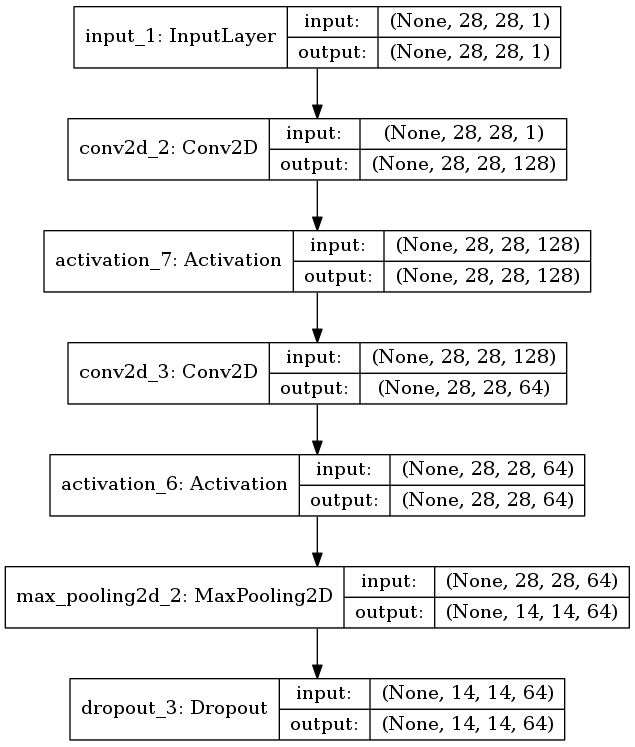

In [ ]:
visu_model(features_extractor, 500, 400)

In [ ]:
import numpy.ma as ma

def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    imgs = np.rollaxis(imgs, 2, 0)
    im_shape = imgs.shape
    imgs = imgs.reshape(-1, im_shape[1], im_shape[2])
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in np.arange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around plt.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im, cax=cax)

## Extract features with random filters

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


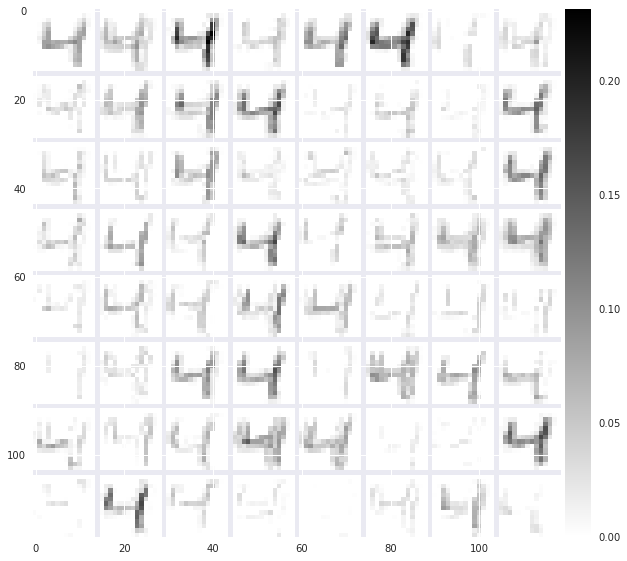

In [ ]:
p_0 = features_extractor.predict(X_train[:3][:, :, :, None])

plt.figure(figsize=(10, 10))
nice_imshow(plt.gca(), make_mosaic(p_0[2], 8, 8), cmap=cm.binary)
plt.show()

In [ ]:
# Build classifier Model

cl_input_shape = features_extractor.output_shape[1:]
classifier = make_model(cl_input_shape, [fl, dense_1, act_1, do_2, dense_out, out_act], 
                        'Classifier')

print('Input shape: {}'.format(classifier.input_shape))
print('Output shape: {}'.format(classifier.output_shape))

Input shape: (None, 14, 14, 64)
Output shape: (None, 10)


In [ ]:
# Build final Model

inputs_stacked = Input(shape=input_shape, name='inputs_stacked')

x = features_extractor(inputs_stacked)
y = classifier(x)

stacked_model = Model(inputs_stacked, y)

In [ ]:
stacked_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_stacked (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
Feature_extractor (Model)    (None, 14, 14, 64)        75072     
_________________________________________________________________
Classifier (Model)           (None, 10)                1607050   
Total params: 1,682,122
Trainable params: 1,682,122
Non-trainable params: 0
_________________________________________________________________


Fontconfig warning: ignoring C.UTF-8: not a valid language tag



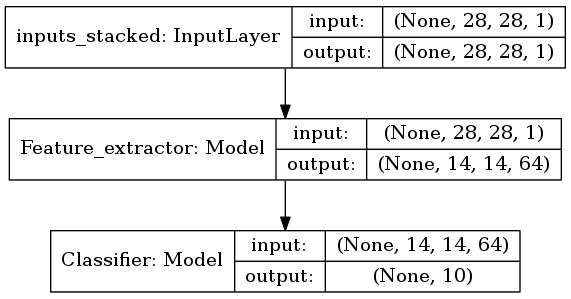

In [ ]:
visu_model(stacked_model)

In [ ]:
stacked_model.compile(loss='categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])

hist_stacked_model = stacked_model.fit(X_train[:, :, :, None], 
                                       Y_train, 
                                       batch_size=batch_size, 
                                       nb_epoch=nb_epoch,
                                       verbose=1,
                                       validation_data=(X_test[:1000, :, :, None], Y_test[:1000]))

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 1000 samples
Epoch 1/5
60000/60000 [==============================] - 6s - loss: 1.0719 - acc: 0.6654 - val_loss: 0.3715 - val_acc: 0.8900

/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:858: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


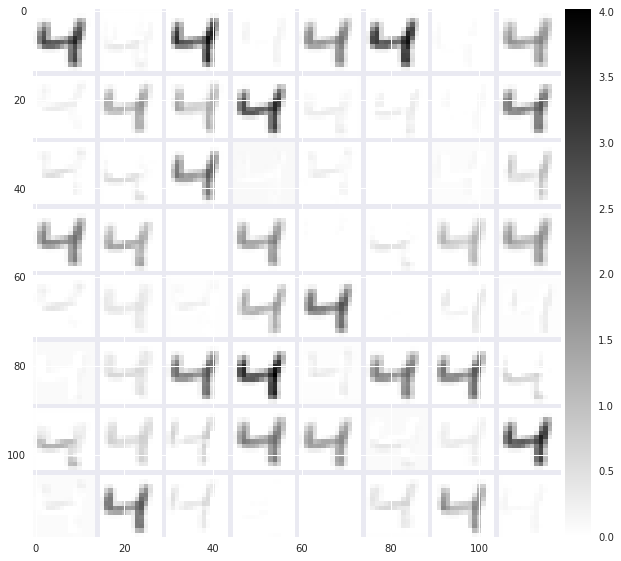

In [ ]:
p_0 = features_extractor.predict(X_train[:3][:, :, :, None])
plt.figure(figsize=(10, 10))
nice_imshow(plt.gca(), make_mosaic(p_0[2], 8, 8), cmap=cm.binary)
plt.show()

## Reusable parts 

- "new" problem: is the digit > than 2?

In [ ]:
sup_two_train = y_train > 2
sup_two_train = sup_two_train.astype(np.int32)
sup_two_test = y_test > 2
sup_two_test = sup_two_test.astype(np.int32)

In [ ]:
# Build a second classifier

fl_sup_two = Flatten()                  # Flatten the image
dense_sup_two = Dense(128)              # Dense hidden layer
act_sup_two = Activation('relu')        # Nonlinearity
do_sup_two = Dropout(0.5)
dense_out_sup_two = Dense(1)            # Output
out_act_sup_two = Activation('sigmoid') # Squash between 0-1
layers = [fl_sup_two, dense_sup_two, act_sup_two, 
          do_sup_two, dense_out_sup_two, out_act_sup_two]
classifier_2 = make_model(cl_input_shape, layers, 'Classifier_2')

In [ ]:
classifier_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1605760   
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total para

## Winter is coming for the feature extractor layers 

In [ ]:
features_extractor.trainable = False

In [ ]:
# Build the multi output model

inputs_multi_output = Input(shape=input_shape, name='input_multi_out')

x = features_extractor(inputs_multi_output)  # Already trained on the first task!
y_1 = classifier(x)                          # Already trained on the first task!
y_2 = classifier_2(x)                        # New!

stacked_model_multi_out = Model(inputs_multi_output, [y_1, y_2])

stacked_model_multi_out.compile(loss=['categorical_crossentropy', 'binary_crossentropy'],
                                optimizer='sgd',
                                metrics=['accuracy'])

In [ ]:
stacked_model_multi_out.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_multi_out (InputLayer)     (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
Feature_extractor (Model)        (None, 14, 14, 64)    75072       input_multi_out[0][0]            
____________________________________________________________________________________________________
Classifier (Model)               (None, 10)            1607050     Feature_extractor[2][0]          
____________________________________________________________________________________________________
Classifier_2 (Model)             (None, 1)             1605889     Feature_extractor[2][0]          
Total params: 3,288,011
Trainable params: 3,212,939
Non-trainable params: 75,072
__________

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



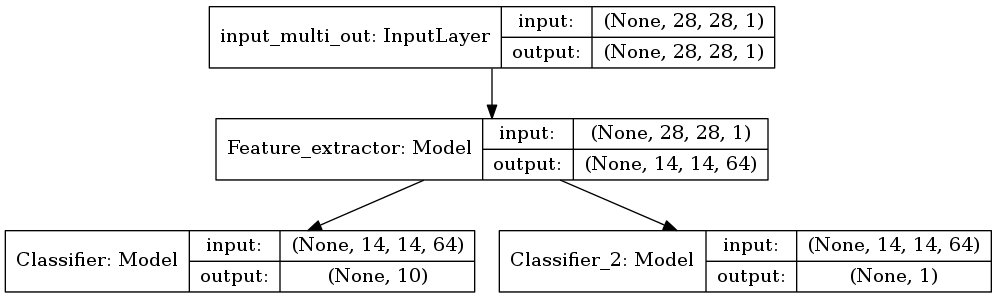

In [ ]:
visu_model(stacked_model_multi_out)

In [ ]:
hist_stacked_model = stacked_model_multi_out.fit(X_train[:, :, :, None], 
                                                 [Y_train, sup_two_train], 
                                                 batch_size=batch_size,
                                                 nb_epoch=nb_epoch,
                                                 verbose=1,
                                                 validation_data=(X_test[:1000, :, :, None],
                                                                  [Y_test[:1000], sup_two_test[:1000]]))

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 1000 samples
Epoch 1/5
60000/60000 [==============================] - 4s - loss: 0.4569 - Classifier_loss: 0.2681 - Classifier_2_loss: 0.1888 - Classifier_acc: 0.9181 - Classifier_2_acc: 0.9287 - val_loss: 0.2465 - val_Classifier_loss: 0.1518 - val_Classifier_2_loss: 0.0947 - val_Classifier_acc: 0.9440 - val_Classifier_2_acc: 0.9720

## Are the layers really frozen?

In [ ]:
np.allclose(p_0, features_extractor.predict(X_train[:3][:, :, :, None]))

True

## Multi inputs multi outputs model 

**New task: predict the sum of 2 digits (mnist images)**

In [ ]:
# Prepare data

def shuffle_data():
    index_1_tr = np.arange(len(X_train))
    np.random.shuffle(index_1_tr)

    index_1_te = np.arange(len(X_test))
    np.random.shuffle(index_1_te)

    add_out_train = y_train[index_1_tr] + y_train
    add_out_test = y_test[index_1_te] + y_test
    
    return index_1_tr, index_1_te, add_out_train, add_out_test

index_1_tr, index_1_te, add_out_train, add_out_test = shuffle_data()

In [ ]:
# Build the addition Model

dense_concat = Dense(128)            # first hidden layer of the regressor
act_concat = Activation('relu')      # rectifier
do_concat = Dropout(0.5)             # regularization
dense_concat_2 = Dense(64)           # second hidden layer of the regressor
act_concat_2 = Activation('relu')    # rectifier
do_concat_2 = Dropout(0.5)           # regularization
dense_concat_out_sup_two = Dense(1)  # linear output to predict the result of the addition
layers = [dense_concat, act_concat, do_concat,
          dense_concat_2, act_concat_2, do_concat_2,
          dense_concat_out_sup_two]
addition_out = make_model((40, ), layers, 'Addition_Model_part_2')

In [ ]:
# Build the features concatenation Model

fl_add = Flatten()                # we flatten the image
dense_add = Dense(256)            # first hidden layer of the regressor
act_add = Activation('relu')      # rectifier
do_add = Dropout(0.5)             # regularization
dense_add_2 = Dense(512)          # second hidden layer of the regressor
act_add_2 = Activation('relu')    # rectifier
do_add_2 = Dropout(0.5)           # regularization
inter_dense = Dense(20)           # last intermediate layer
act_add_3 = Activation('relu')    # rectifier
layers = [fl_add, dense_add, act_add, do_add,
          dense_add_2, act_add_2, do_add_2,
          inter_dense, act_add_3]
addition_features = make_model((14, 14, 128), layers, 'Addition_Model_part_1')


In [ ]:
from keras.layers import merge                         # import the merge function

# Build the stacked multi in out Model

features_extractor.trainable = True                    # reactivate the layers of this model during training

inputs_add_1 = Input(shape=input_shape, name='num_1')  # image 1
inputs_add_2 = Input(shape=input_shape, name='num_2')  # image 2

x_1 = features_extractor(inputs_add_1)                 # apply the feature extractor on the 1st image
d_1 = classifier(x_1)                                  # predict probabilities

x_2 = features_extractor(inputs_add_2)                 # apply the feature extractor on the 2nd image
d_2 = classifier(x_2)                                  # predict probabilities

x_1_2 = merge([x_1, x_2], mode='concat', 
              concat_axis=-1)                          # merge the two set of features on the last axis
                                                       # (None, 14, 14, 64)|(None, 14, 14, 64)>(None, 14, 14, 128)
int_output = addition_features(x_1_2)                  # apply the addition model to the concat features

xy_1_2 = merge([int_output, d_1, d_2], 
               mode='concat', concat_axis=-1)

output_add = addition_out(xy_1_2)

multi_in_out = Model([inputs_add_1, inputs_add_2], [d_1, d_2, output_add])

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/conda/lib/python3.6/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [ ]:
multi_in_out.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
num_1 (InputLayer)               (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
num_2 (InputLayer)               (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
Feature_extractor (Model)        (None, 14, 14, 64)    75072       num_1[0][0]                      
                                                                   num_2[0][0]                      
____________________________________________________________________________________________________
merge_1 (Merge)                  (None, 14, 14, 128)   0           Feature_extractor[3][0] 

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



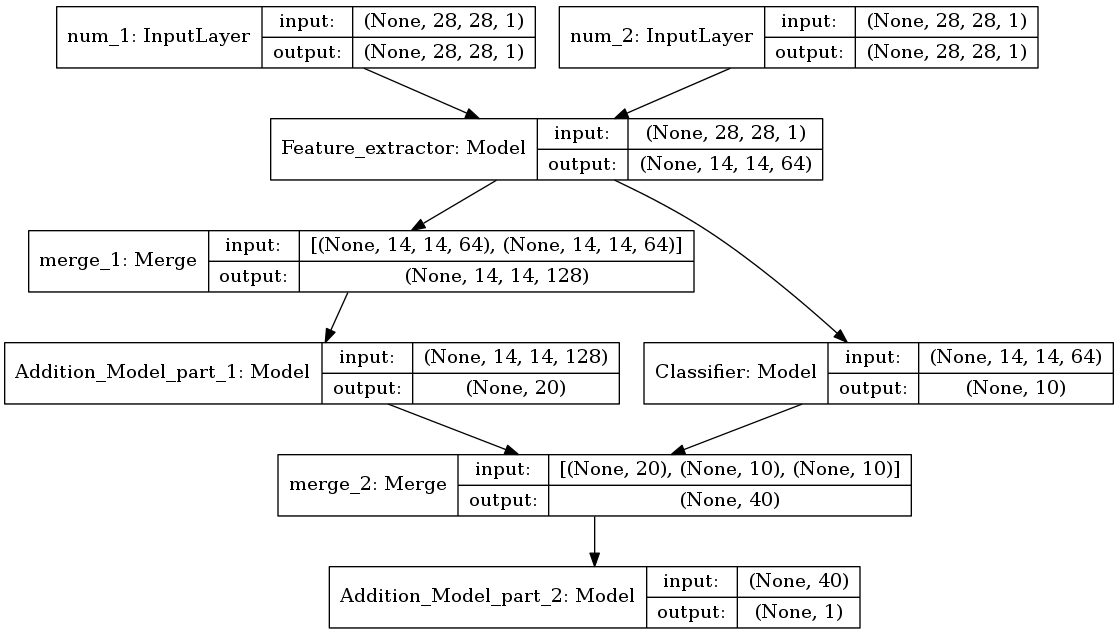

In [ ]:
visu_model(multi_in_out)

In [ ]:
multi_in_out.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'mse'],
                     optimizer='adam',
                     metrics=['accuracy'])

for i in range(2):
    verbose = 0
    if i == 19 or i == 0:
        verbose = 1
    index_1_tr, index_1_te, add_out_train, add_out_test = shuffle_data()     # get new targets and shuffle
    inputs_train = [X_train[index_1_tr, :, :, None], X_train[:, :, :, None]] # reindex inputs
    outputs_train = [Y_train[index_1_tr], Y_train, add_out_train]            # reindex outputs

    inputs_test = [X_test[index_1_te, :, :, None], X_test[:, :, :, None]]    # same for test data
    outputs_test = [Y_test[index_1_te], Y_test, add_out_test]
    
    hist_stacked_model = multi_in_out.fit(inputs_train, outputs_train,
                                          batch_size=batch_size,
                                          epochs=nb_epoch,
                                          verbose=verbose,
                                          validation_data=(inputs_test, outputs_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s - loss: 11.3228 - Classifier_loss_1: 0.2264 - Classifier_loss_2: 0.2304 - Addition_Model_part_2_loss: 10.8660 - Classifier_acc_1: 0.9344 - Classifier_acc_2: 0.9315 - Addition_Model_part_2_acc: 0.1643 - val_loss: 1.7374 - val_Classifier_loss_1: 0.0768 - val_Classifier_loss_2: 0.0768 - val_Addition_Model_part_2_loss: 1.5837 - val_Classifier_acc_1: 0.9767 - val_Classifier_acc_2: 0.9767 - val_Addition_Model_part_2_acc: 0.3007

In [ ]:
nb_preds = 20
preds = multi_in_out.predict([X_test[index_1_te, :, :, None][:nb_preds], 
                              X_test[:nb_preds, :, :, None]])
print('{:^10} | {:^10}'.format('observed', 'predicted'))
for i in range(nb_preds):
    print('{} + {} = {:^2} | {} + {} = {:^2.0f}'.format(y_test[index_1_te][i],   # value 1st digit 
                                                        y_test[i],               # value 2nd digit
                                                        add_out_test[i],         # observed sum of the two digits
                                                        np.argmax(preds[0][i]),  # predicted value 1st digit
                                                        np.argmax(preds[1][i]),  # predicted value 2nd digit
                                                        preds[2][i][0]))         # predicted value for the sum

 observed  | predicted 
3 + 7 = 10 | 3 + 7 = 10
5 + 2 = 7  | 5 + 2 = 7 
6 + 1 = 7  | 6 + 1 = 7 
9 + 0 = 9  | 9 + 0 = 9 
0 + 4 = 4  | 0 + 4 = 4 
6 + 1 = 7  | 6 + 1 = 7 
0 + 4 = 4  | 0 + 4 = 4 
3 + 9 = 12 | 3 + 9 = 12
1 + 5 = 6  | 1 + 5 = 6 
7 + 9 = 16 | 2 + 9 = 13
5 + 0 = 5  | 5 + 0 = 5 
9 + 6 = 15 | 9 + 6 = 15
9 + 9 = 18 | 9 + 9 = 17
8 + 0 = 8  | 8 + 0 = 8 
5 + 1 = 6  | 5 + 1 = 6 
3 + 5 = 8  | 3 + 5 = 8 
0 + 9 = 9  | 0 + 9 = 9 
7 + 7 = 14 | 7 + 7 = 14
6 + 3 = 9  | 6 + 3 = 9 
2 + 4 = 6  | 2 + 4 = 6 


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


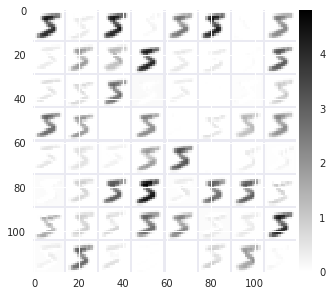

In [ ]:
plt.figure(figsize=(5, 5))
nice_imshow(plt.gca(), make_mosaic(p_0[0], 8, 8), cmap=cm.binary)
plt.show()

# RNNs 

New task: learn to compute the cumulative sum of digits given images

## New dataset

In [ ]:
from keras.layers import merge
from sklearn.feature_extraction import image

# Prepare data

def get_sequences(seq_length=5):
    index_1_tr = np.arange(len(X_train))
    np.random.shuffle(index_1_tr)
    index_1_tr = image.extract_patches(index_1_tr, 
                                       patch_shape=seq_length)

    index_1_te = np.arange(len(X_test))
    np.random.shuffle(index_1_te)
    index_1_te = image.extract_patches(index_1_te,
                                      patch_shape=seq_length)

    add_out_train = np.cumsum(y_train[index_1_tr], axis=1)
    add_out_test = np.cumsum(y_test[index_1_te], axis=1)
    
    return index_1_tr, index_1_te, add_out_train, add_out_test

index_1_tr, index_1_te, add_out_train, add_out_test = get_sequences()
X_train_ext = X_train[:, :, :, None]
X_test_ext = X_test[:, :, :, None]

In [ ]:
add_out_train[0]

array([2, 3, 4, 5, 6], dtype=uint64)

## Wrappers 

In [ ]:
from keras.layers.wrappers import TimeDistributed

seq_length = 10
input_shape = (seq_length, 28, 28, 1)

features_extractor.trainable = True                           # fine tune the FE model

td_fe = TimeDistributed(features_extractor, 
                        input_shape=input_shape,
                        name='td_features_extractor')
td_cl = TimeDistributed(classifier, 
                        input_shape=(seq_length, 14, 14, 128),
                        name='td_classifier')

## RNNs 

In [ ]:
from keras.layers import LSTM, GRU
RNN = GRU

GRU_1 = RNN(128, return_sequences=True)
gru_act_1 = Activation('relu')
ts_dense = TimeDistributed(Dense(1))
output_act = Activation('relu')

rnn_model = make_model((seq_length, 512 + 10), 
                       [GRU_1, gru_act_1, ts_dense, output_act],
                       name='rnn_model')

In [ ]:
print('Input shape: {}'.format(rnn_model.input_shape))
print('Output shape: {}'.format(rnn_model.output_shape))

Input shape: (None, 10, 522)
Output shape: (None, 10, 1)


## Flattened feature branch

In [ ]:
fl_add = Flatten()                # we flatten the image
dense_add = Dense(512)            # first hidden layer of the regressor
act_add = Activation('relu')      # rectifier
do_add = Dropout(0.5)             # regularization
dense_add_2 = Dense(512)          # second hidden layer of the regressor
act_add_2 = Activation('relu')    # rectifier
layers = [fl_add, dense_add, act_add, do_add,
          dense_add_2, act_add_2]
addition_features = make_model((14, 14, 64), layers, 'Recurent_addition_model_features_1')
td_af = TimeDistributed(addition_features, input_shape=(seq_length, 14, 14, 64))

## Apply all the parts of the model 

In [ ]:
inputs_rec = Input(shape=input_shape, name='num_2')  # image 2

x = td_fe(inputs_rec)
d = td_cl(x)
raw_feat = td_af(x)
raw_feat = Dropout(0.5)(raw_feat)
d_1 = merge([d, raw_feat], mode='concat', concat_axis=-1)
output_rec = rnn_model(d_1)

cum_sum_model = Model(inputs_rec, output_rec)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/conda/lib/python3.6/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [ ]:
cum_sum_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
num_2 (InputLayer)               (None, 10, 28, 28, 1) 0                                            
____________________________________________________________________________________________________
td_features_extractor (TimeDistr (None, 10, 14, 14, 64 75072       num_2[0][0]                      
____________________________________________________________________________________________________
time_distributed_2 (TimeDistribu (None, 10, 512)       6685696     td_features_extractor[0][0]      
____________________________________________________________________________________________________
td_classifier (TimeDistributed)  (None, 10, 10)        1607050     td_features_extractor[0][0]      
___________________________________________________________________________________________

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



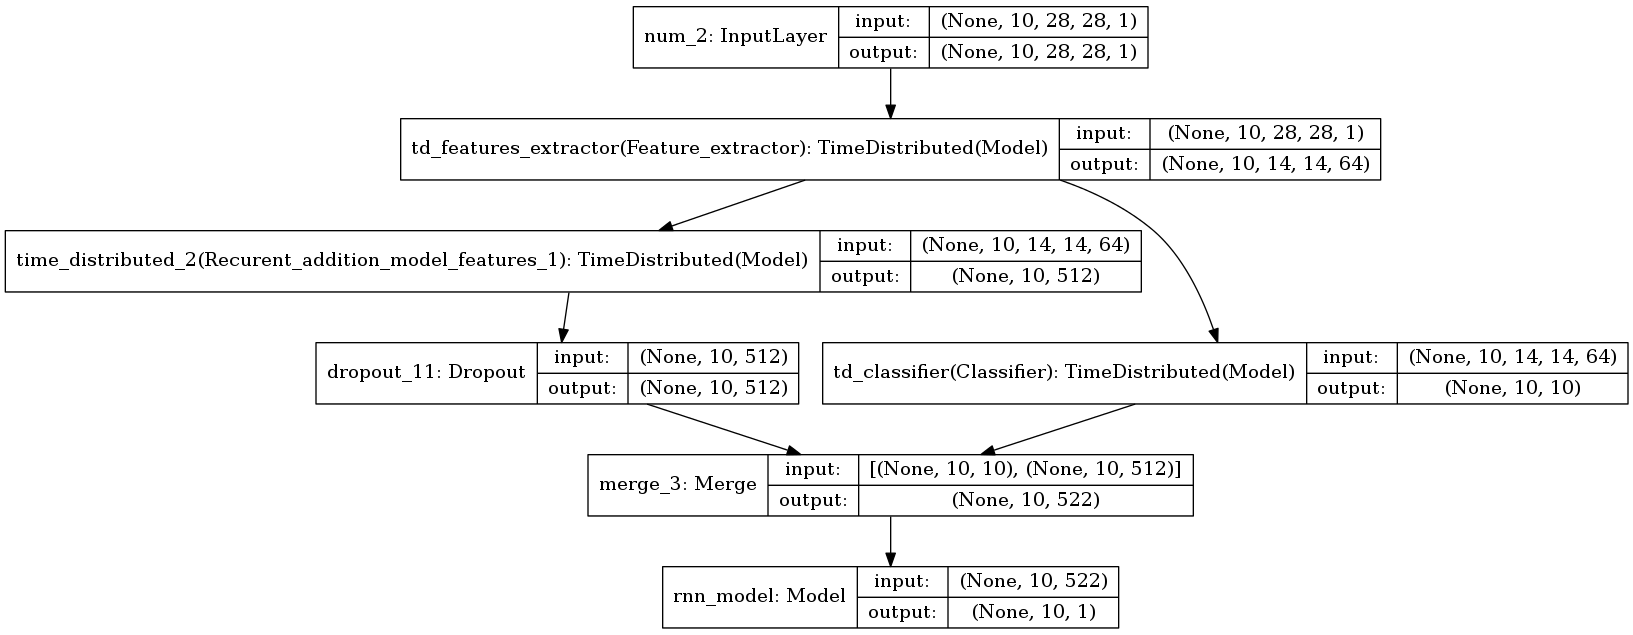

In [ ]:
visu_model(cum_sum_model)

## Optimizers 

In [ ]:
from keras.optimizers import Adam, RMSprop, SGD

adam = Adam(lr=0.001)

cum_sum_model.compile(loss='mse',
                      optimizer=adam)

# Other callbacks 

In [ ]:
from keras.callbacks import ReduceLROnPlateau

# when we are boucing, reduce the learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001, verbose=1)

In [ ]:
for i in range(4):
    verbose = 0
    if i % 2 == 0:
        verbose = 2
    index_1_tr, index_1_te, add_out_train, add_out_test = get_sequences(seq_length)  # get new dataset and shuffle
    inputs_train = X_train_ext[index_1_tr]                                           # reindex inputs
    outputs_train = add_out_train[:, :, None]                                        # reindex outputs

    inputs_test = X_test_ext[index_1_te]
    outputs_test = add_out_test[:, :, None]
    hist_stacked_model = cum_sum_model.fit(inputs_train, outputs_train,
                                           batch_size=batch_size * 3,
                                           epochs=nb_epoch * 2,
                                           verbose=verbose,
                                           validation_data=(inputs_test, outputs_test),
                                           callbacks=[reduce_lr])                   # we add the callback here!

Train on 59991 samples, validate on 9991 samples
Epoch 1/10
61s - loss: 378.7920 - val_loss: 241.1030
Epoch 2/10
59s - loss: 166.8791 - val_loss: 112.8837
Epoch 3/10
59s - loss: 81.9015 - val_loss: 70.9030
Epoch 4/10
59s - loss: 44.9505 - val_loss: 54.4238
Epoch 5/10
59s - loss: 26.7422 - val_loss: 34.0909
Epoch 6/10
59s - loss: 17.0624 - val_loss: 21.3208
Epoch 7/10
59s - loss: 11.4948 - val_loss: 13.7214
Epoch 8/10
59s - loss: 8.1242 - val_loss: 9.5010
Epoch 9/10
59s - loss: 5.9412 - val_loss: 6.7410
Epoch 10/10
59s - loss: 4.4909 - val_loss: 5.0403
Train on 59991 samples, validate on 9991 samples
Epoch 1/10
59s - loss: 0.6416 - val_loss: 1.1811
Epoch 2/10
59s - loss: 0.5610 - val_loss: 1.1969
Epoch 3/10
59s - loss: 0.4972 - val_loss: 1.0725
Epoch 4/10
59s - loss: 0.4321 - val_loss: 1.0176
Epoch 5/10
59s - loss: 0.3923 - val_loss: 0.9761
Epoch 6/10
59s - loss: 0.3618 - val_loss: 0.9088
Epoch 7/10
59s - loss: 0.3274 - val_loss: 0.8263
Epoch 8/10
59s - loss: 0.2972 - val_loss: 0.8923
E

## Let's test the model with new sequences 

In [ ]:
index_1_tr, index_1_te, add_out_train, add_out_test = get_sequences(seq_length)  # get new dataset and shuffle
inputs_train = X_train_ext[index_1_tr]                                           # reindex inputs
outputs_train = add_out_train[:, :, None]                                        # reindex outputs

inputs_test = X_test_ext[index_1_te]
outputs_test = add_out_test[:, :, None]

In [ ]:
predictions = zip(cum_sum_model.predict(inputs_train[:10]), outputs_train[:10])
print('{:^14} | {:^14}'.format('observed', 'predicted'))
for pred, true in predictions:
    pred = np.round(pred).astype(np.int32)
    template = '{:^2} {:^2} {:^2} {:^2} {:^2}'
    pred = list(pred.flatten())
    pred = template.format(*pred)
    true = list(true.flatten())
    true = template.format(*true)
    
    print('{} | {}'.format(true, pred))
     
        

   observed    |   predicted   
3  10 18 21 23 | 3  10 18 21 23
7  15 18 20 24 | 7  15 18 20 24
8  11 13 17 19 | 8  11 13 17 19
3  5  9  11 20 | 3  5  9  11 20
2  6  8  17 26 | 2  6  8  17 26
4  6  15 24 28 | 4  6  15 24 28
2  11 20 24 24 | 2  11 20 24 24
9  18 22 22 30 | 9  18 22 22 30
9  13 13 21 24 | 9  13 13 21 24
4  4  12 15 20 | 4  4  12 15 20


# Conclusion

## We saw:
- choosing a NN library
- MLP, convnets, RNNs
- building models with multiple levels of abstraction
- reusing building blocks
- fine tuning parts of models
- optimizers
- callbacks

## We missed:
- [Lambda layers](https://keras.io/layers/core/#lambda)
- [Optimizers](https://keras.io/optimizers/)
- [TensorFlow contexts to use model parallelism](https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html)
- a lot of other functionnalities and models!
- How to implement custom layers

# Thank you! 

# Resources 

- [Keras documentation](keras.io)
- [examples from the library](https://github.com/fchollet/keras/tree/master/examples)
- [keras-ressources](https://github.com/fchollet/keras-resources)
- [keras-blog](https://blog.keras.io/)
- [filter and outputs visualization](https://github.com/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist.ipynb)
- [Deep learning with Keras (Tutorial @ EuroScipy 2016)](https://github.com/leriomaggio/deep-learning-keras-tensorflow)
- [Deep Learning: Keras Short Tutorial [video]](https://www.youtube.com/watch?v=Tp3SaRbql4k)